<a href="https://colab.research.google.com/github/ananboon/Data-science-portfolio/blob/main/MNIST_dataset_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

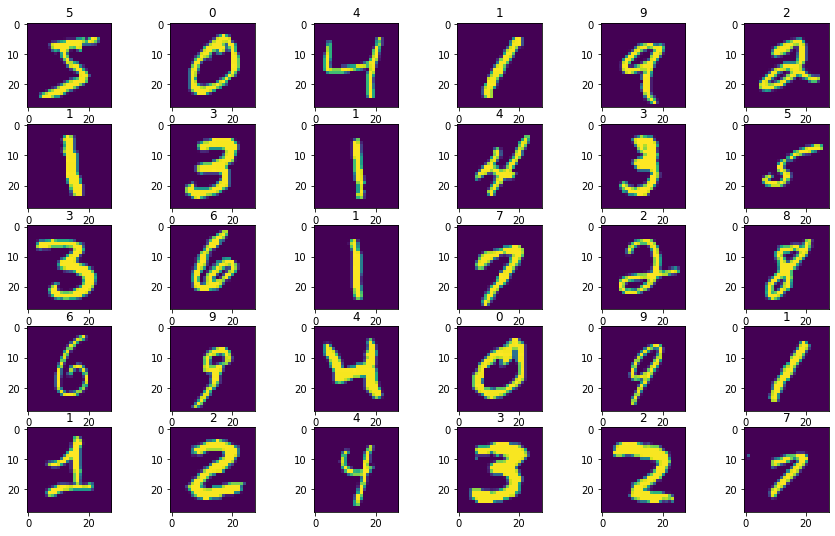

In [ ]:
# Plot some data
plt.figure(figsize=(15,9))
for i in range(30):
  plt.subplot(5,6,1+i)
  plt.title(y_train[i])
  plt.imshow(x_train[i].reshape(28,28))

In [ ]:
print('Traning data shape', x_train.shape)
print('Traning label shape',y_train.shape)

print('Test data shape',x_test.shape)
print('Test label shape',y_test.shape)

# expand 1 dimension for channel
x_train = tf.expand_dims(x_train, -1)
x_test = tf.expand_dims(x_test, -1)
print('Traning data expanded shape', x_train.shape)
print('Test data expanded shape',x_test.shape)

labels = np.unique(y_train)

labelsCount = pd.Series(y_train).value_counts()
print('labels',labels)
print('labelsCount\n',labelsCount)

Traning data shape (60000, 28, 28)
Traning label shape (60000,)
Test data shape (10000, 28, 28)
Test label shape (10000,)
Traning data expanded shape (60000, 28, 28, 1)
Test data expanded shape (10000, 28, 28, 1)
labels [0 1 2 3 4 5 6 7 8 9]
labelsCount
 1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 32,(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # ten classes classification
])

model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')

history1 = model.fit(x_train,y_train,batch_size = 32,
                    validation_data = (x_test,y_test),
                    epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4962 - acc: 0.8813 - val_loss: 0.1468 - val_acc: 0.9624
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0870 - acc: 0.9745 - val_loss: 0.1265 - val_acc: 0.9666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - acc: 0.9817 - val_loss: 0.1183 - val_acc: 0.9684
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.1201 - val_acc: 0.9735
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - acc: 0.9857 - val_loss: 0.1476 - val_acc: 0.9682
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - acc: 0.9871 - val_loss: 0.1284 - val_acc: 0.9715
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - acc: 0.9888 - val_loss: 0.1515 - val_acc: 0.9743
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

Accuracy on both training and testing data set looks pretty good.
 But it is a bit overfitted on the traning set.

Lets' try augment the traning data and add another set of Cov2d and pooling layer.

In [ ]:
# augment & normalized data

trainDatagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 10, 
    width_shift_range = 0.1 , height_shift_range = 0.1,
    zoom_range = 0.1)

testDatagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [ ]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D( 32,(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D( 64,(3,3),input_shape=(28,28,1), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # ten classes classification
])

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________

In [ ]:
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')

history2 = model.fit_generator(trainDatagen.flow(x_train,y_train,batch_size = 32),
                              validation_data = testDatagen.flow(x_test,y_test),
                              epochs=10,verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6092 - acc: 0.8042 - val_loss: 0.0627 - val_acc: 0.9796
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1388 - acc: 0.9573 - val_loss: 0.0536 - val_acc: 0.9846
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1019 - acc: 0.9684 - val_loss: 0.0359 - val_acc: 0.9888
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0826 - acc: 0.9752 - val_loss: 0.0395 - val_acc: 0.9882
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0744 - acc: 0.9765 - val_loss: 0.0338 - val_acc: 0.9894
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0652 - acc: 0.9793 - val_loss: 0.0309 - val_acc: 0.9900
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0578 - acc: 0.9822 - val_loss: 0.0265 - val_acc: 0.9918
Epoch 8/10
1875/1875 [==============================] - 19s

# Plot accuracy and loss over epochs to compare two models


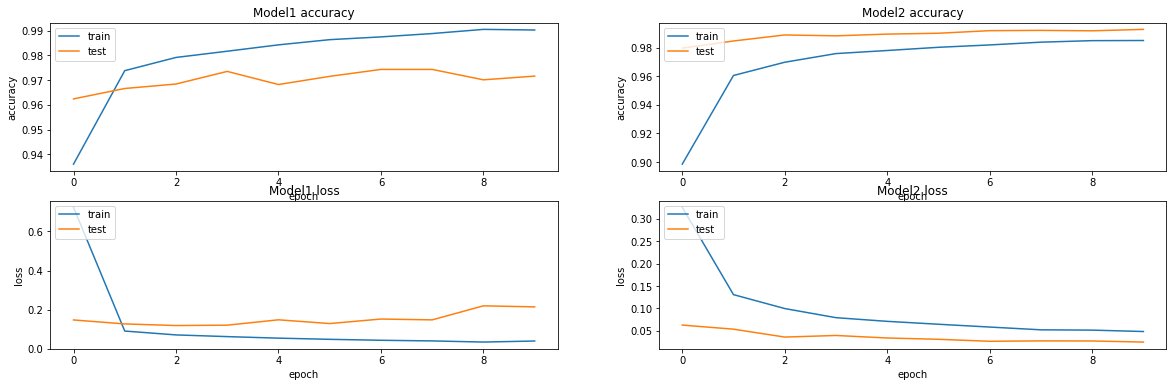

In [ ]:

plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,4)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()